In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
df = pd.read_csv('D:\\pawel\\dataScience kurs infoShare\\projekt 3 grupowy\\wine_quality_merged.csv')

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [10]:
df.shape

(6497, 13)

In [ ]:

df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [17]:
df['type'] = df['type'].map({'white':0,'red':1})
# 1 = red

In [18]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     1  
1      9.8        5     1  
2      9.8        5     1  
3      9.8        6     1  
4      9.4        5     1

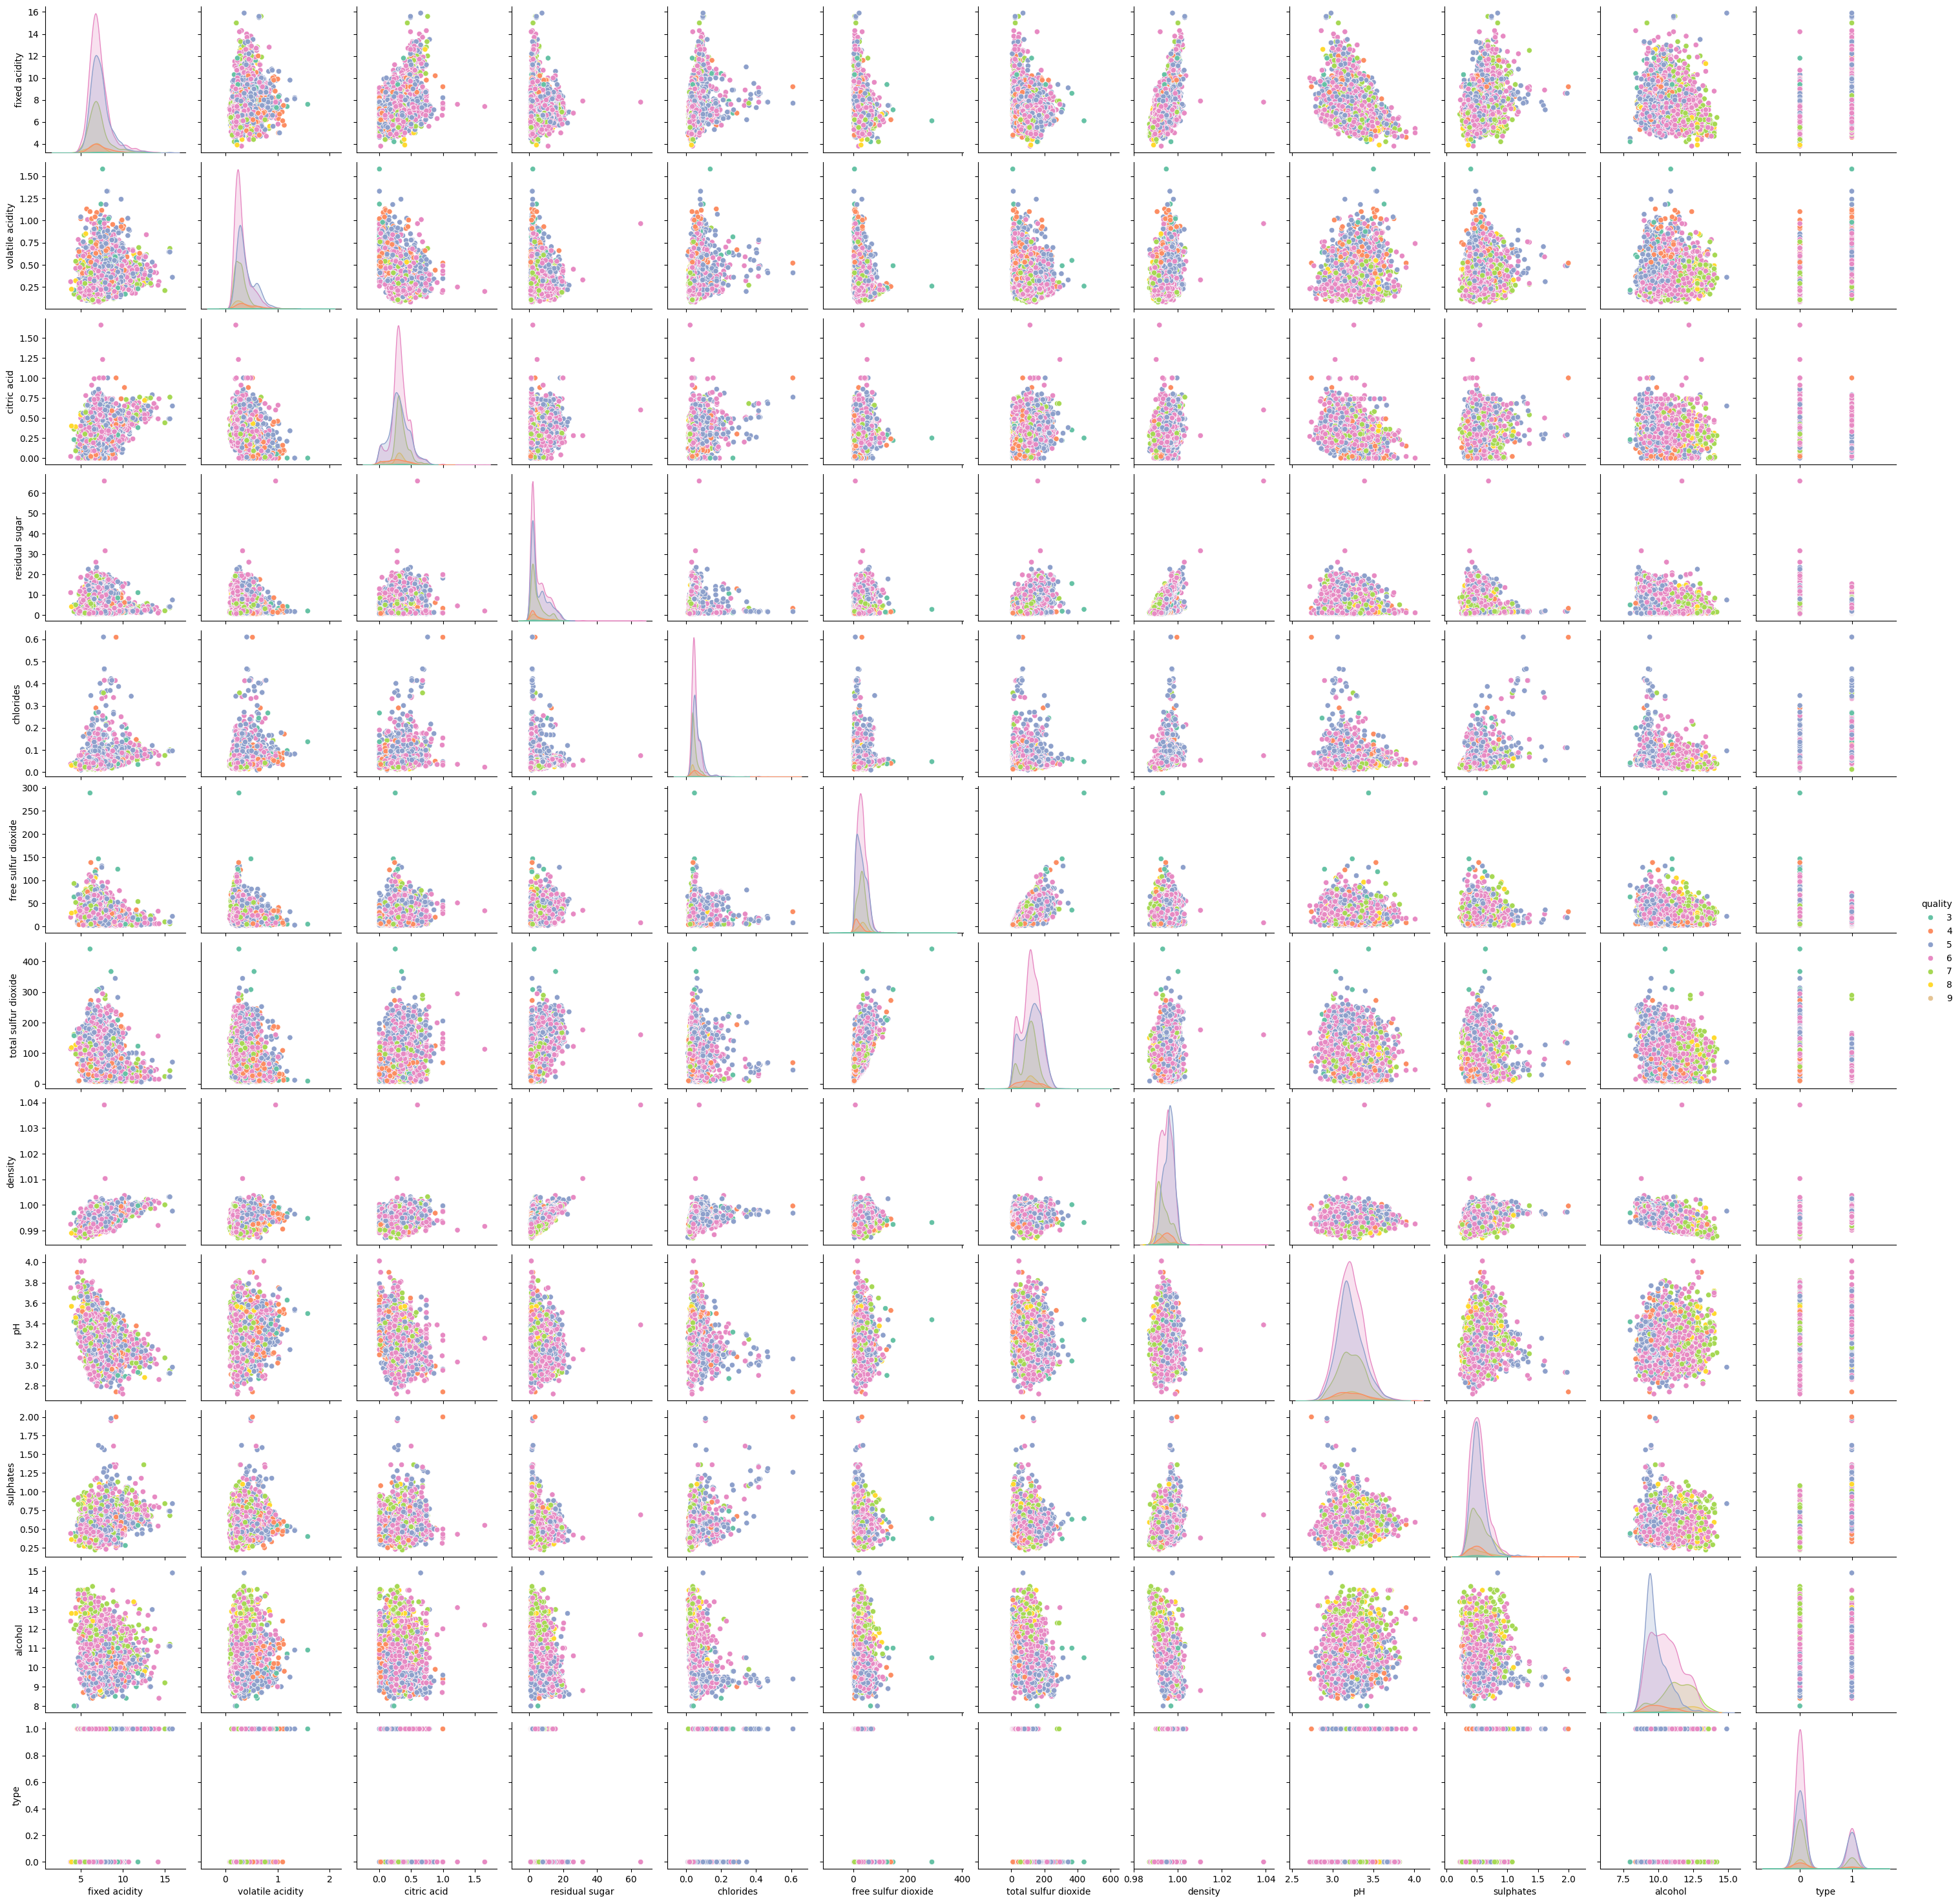

In [19]:
sns.pairplot(df, hue='quality',palette='Set2')
plt.show()

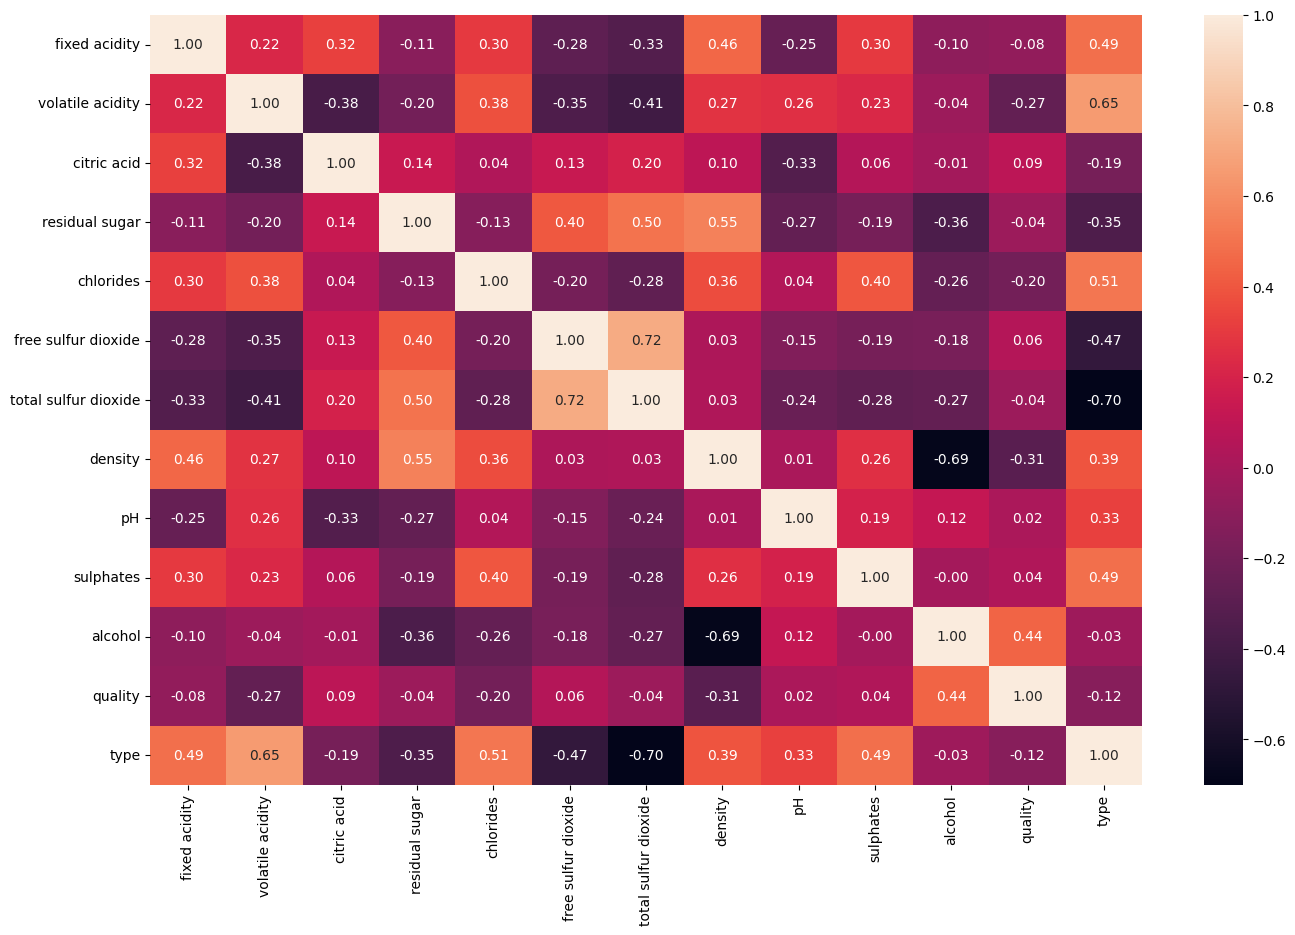

In [23]:

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True,fmt='.2f')
plt.show()

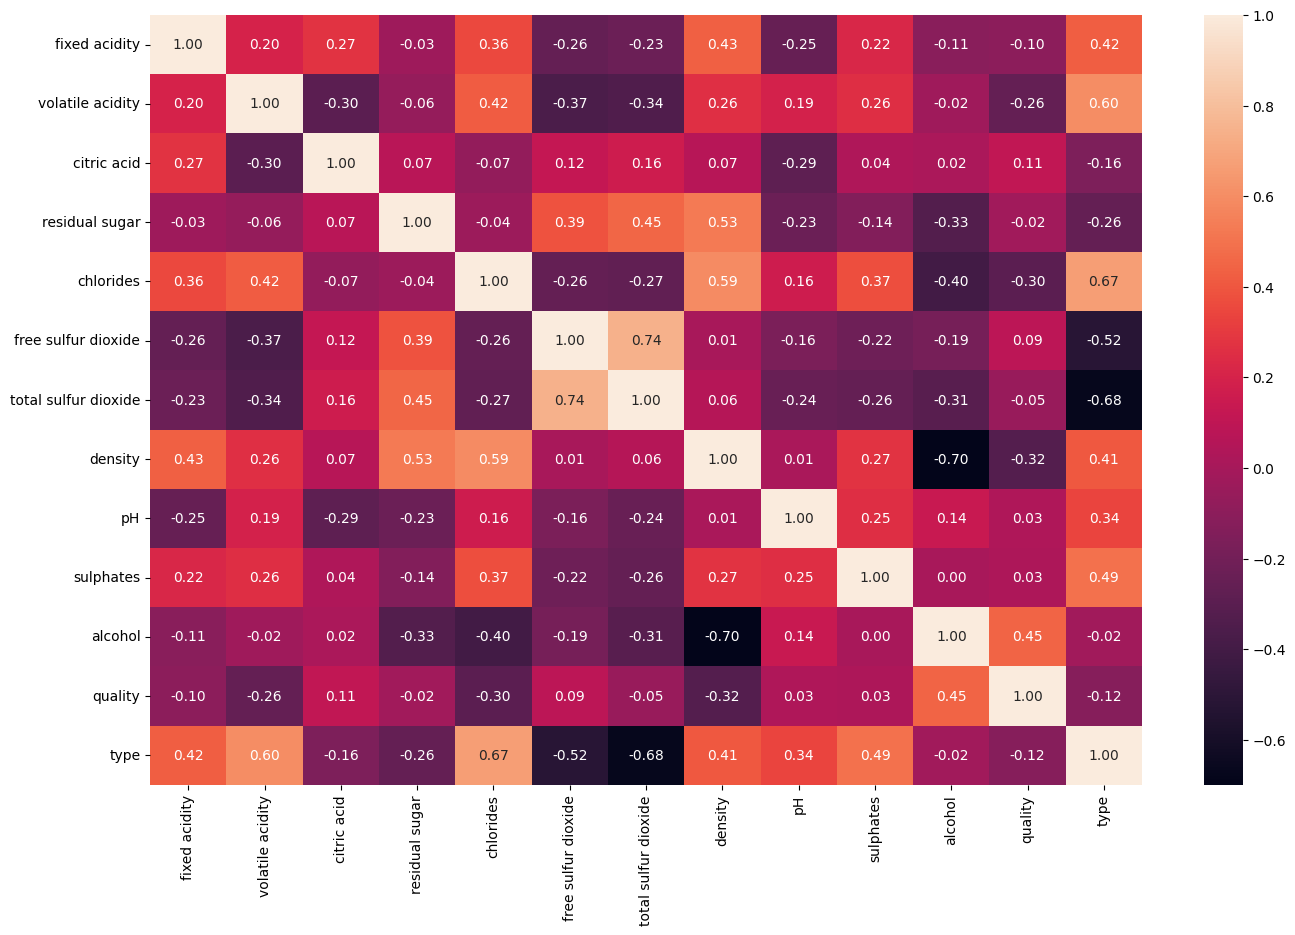

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='spearman'), annot=True,fmt='.2f')
plt.show()

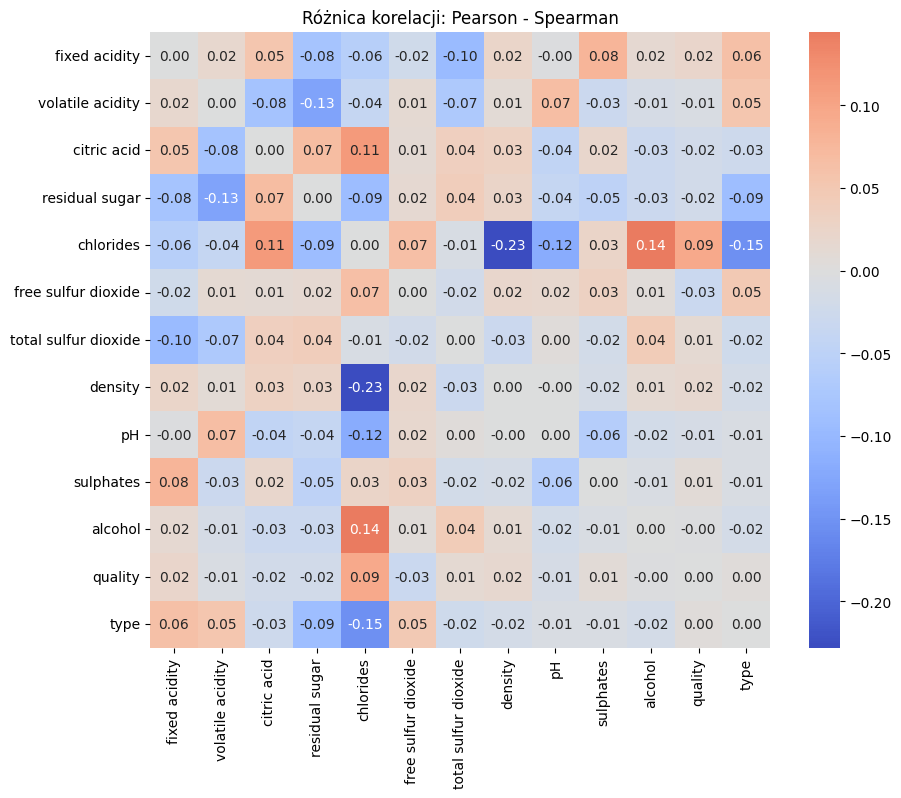

In [26]:
corr_pearson = df.corr(method='pearson')
corr_spearman = df.corr(method='spearman')
# policz różnicę
corr_diff = corr_pearson - corr_spearman
# narysuj heatmapę różnic
plt.figure(figsize=(10,8))
sns.heatmap(corr_diff, annot=True, cmap="coolwarm", center=0, fmt='.2f')
plt.title("Różnica korelacji: Pearson - Spearman")
plt.show()

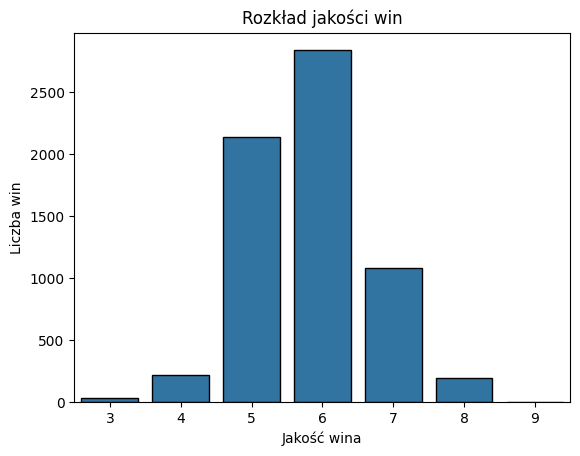

In [28]:
sns.countplot(x="quality", data=df, edgecolor="black")
plt.xlabel("Jakość wina")
plt.ylabel("Liczba win")
plt.title("Rozkład jakości win")
plt.show()

In [ ]:
#badanie czy roskład jest normalny - nie jest normalny
from scipy.stats import shapiro
stat, p = shapiro(df["quality"])
print("Statystyka:", stat, "p-value:", p)
if p > 0.05:
    print("Nie odrzucamy hipotezy normalności – rozkład bliski normalnemu")
else:
    print("Odrzucamy hipotezę normalności – rozkład nie jest normalny")

Statystyka: 0.8841072016191466 p-value: 1.1388205246254468e-56
Odrzucamy hipotezę normalności – rozkład nie jest normalny


c:\Users\pawel\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6497.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#badanie skośności - <0 (ujemna): Rozkład ma lewostronną skośność.
#badanie kurtozy - <3 rozkład bardziej płaski od normalnego
# nie trzeba stosować transformacji do zmiennej
print(df["quality"].skew())
print(df["quality"].kurtosis())



0.18962269337269683
0.2323222693432636


In [38]:
X = df.drop(['quality'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [41]:
model = LinearRegression()
model.fit(X_train_sc, y_train)
# 2. Predykcja na zbiorze testowym
y_pred = model.predict(X_test_sc)
# 3. Ocena modelu
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")
# 4. Jeśli chcesz przewidzieć całkowite oceny wina
y_pred_rounded = np.clip(np.round(y_pred), 3, 9)  # zaokrąglamy i przycinamy do zakresu 3-9

MAE: 0.564
RMSE: 0.736
R2: 0.267


In [ ]:
#Wszystkie te trzy metryki dają pełniejszy obraz jakości Twojego modelu regresji.

#MAE i RMSE mówią o skali błędu, a różnica między nimi (0.736 vs 0.564) sugeruje, że w Twoich przewidywaniach występują duże błędy (skoro RMSE jest znacznie większe niż MAE).

#R² wskazuje, że model jest słaby i wyjaśnia tylko niewielką część danych. Być może potrzebujesz więcej danych, innych cech lub bardziej złożonego algorytmu.

In [44]:
# Zakładamy, że X_train_sc, X_test_sc, y_train, y_test są gotowe
# 1. Stworzenie modelu bazowego
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
# 2. Definicja siatki parametrów
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# 3. GridSearch z 5-krotną walidacją krzyżową
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
# 4. Trenowanie
grid_search.fit(X_train_sc, y_train)
# 5. Najlepszy model i parametry
best_rf = grid_search.best_estimator_
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik MSE (CV):", -grid_search.best_score_)
# 6. Predykcja i ocena na zbiorze testowym
y_pred = best_rf.predict(X_test_sc)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")
# 7. Zaokrąglanie do ocen całkowitych
y_pred_rounded = np.clip(np.round(y_pred), 3, 9)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Najlepsze parametry: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Najlepszy wynik MSE (CV): 0.3787831805442446
MAE: 0.436
RMSE: 0.607
R2: 0.502


In [45]:
accuracy = np.mean(y_pred_rounded == y_test)
print(f"Dokładność przewidywania całkowitych ocen: {accuracy:.2%}")

Dokładność przewidywania całkowitych ocen: 67.54%


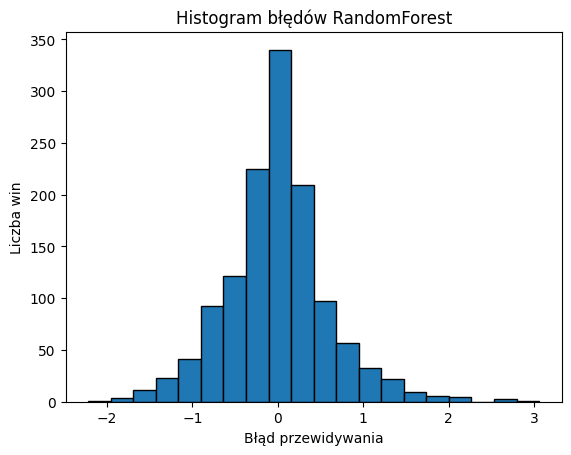

In [47]:
errors = y_pred - y_test
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel("Błąd przewidywania")
plt.ylabel("Liczba win")
plt.title("Histogram błędów RandomForest")
plt.show()

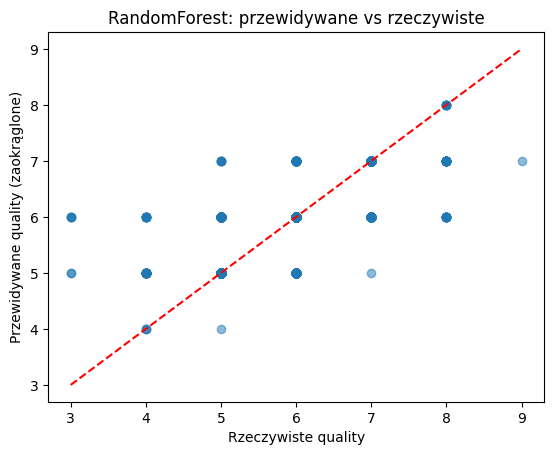

In [48]:
y_pred_rounded = np.clip(np.round(y_pred), 3, 9)
plt.scatter(y_test, y_pred_rounded, alpha=0.5)
plt.plot([3,9],[3,9], 'r--')
plt.xlabel("Rzeczywiste quality")
plt.ylabel("Przewidywane quality (zaokrąglone)")
plt.title("RandomForest: przewidywane vs rzeczywiste")
plt.show()